Zbiór danych zawiera historyczne ceny sprzedaży samochodów na aukcjach, zebrane z zewnętrznych źródeł internetowych. Został zebrany w 2015 roku.

Zbiór danych zawiera następujące kolumny:
- year - rok produkcji pojazdu;
- make - marka pojazdu (np. Toyota, Ford);
- model - model pojazdu (np. Corolla, Mustang);
- trim - wersja wyposażenia pojazdu (np. SE, Base);
- body - rodzaj nadwozia pojazdu (np. sedan, SUV);
- transmission - rodzaj skrzyni biegów (np. automatyczna, manualna);
- vin - numer identyfikacyjny pojazdu (VIN);
- state - stan (lokalizacja geograficzna) w USA, gdzie odbyła się sprzedaż;
- condition - stan pojazdu oceniany w skali od 1 do 5, gdzie wyższe wartości oznaczają lepszy stan techniczny (zmienna ciągła);
- odometer - przebieg pojazdu w milach;
- color - kolor karoserii pojazdu;
- interior - kolor wnętrza pojazdu;
- seller - nazwa lub identyfikator sprzedającego pojazd;
- mmr - wartość pojazdu według Manheim Market Report (MMR), używana jako wskaźnik wartości rynkowej;
- sellingprice - rzeczywista cena sprzedaży pojazdu na aukcji;
- saledate - data sprzedaży pojazdu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv', on_bad_lines='skip')
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.shape

(558811, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
missing_values = df.isnull().sum()

print(missing_values)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64
year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64


In [6]:
nums = df.select_dtypes(exclude=['object'])
nums.describe(percentiles=(.25, .75, .90, .95, .98))

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
90%,2014.000000,4.600000,142760.400000,25500.000000,25500.000000
95%,2014.000000,4.800000,170059.000000,30600.000000,30600.000000
98%,2014.000000,5.000000,202596.680000,38500.000000,38500.000000


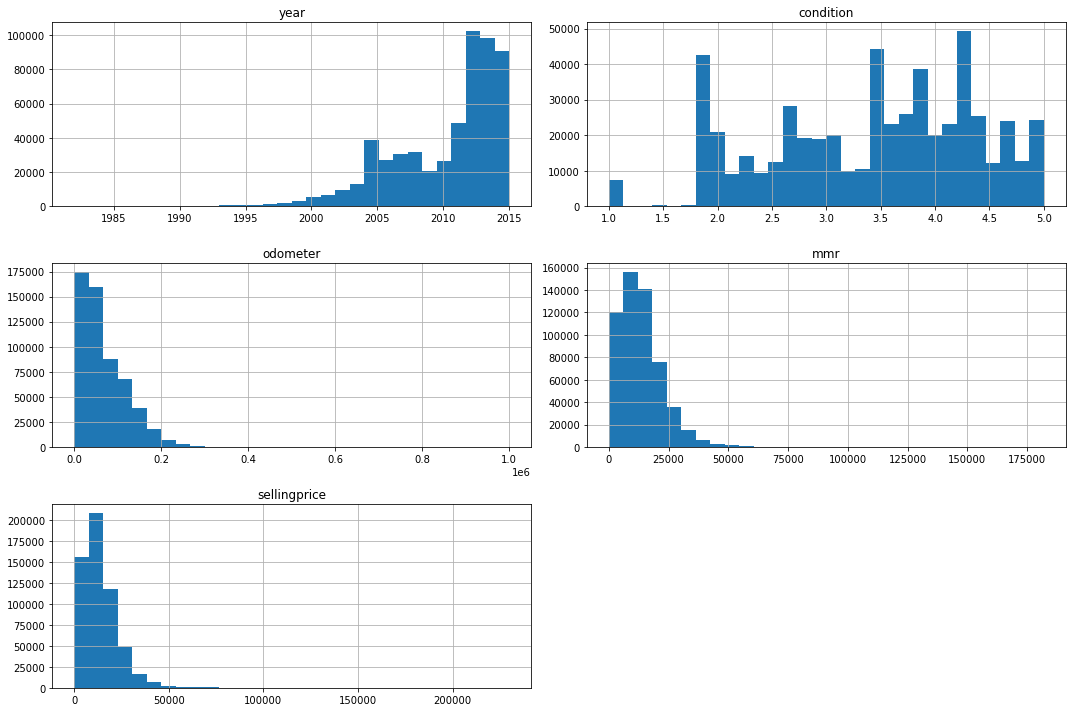

In [7]:
nums.hist(bins=30, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

In [8]:
non_nums = df.select_dtypes(include=['object'])
non_nums.describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334
